In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

from datetime import datetime
from wordcloud import WordCloud

In [54]:
pd.set_option('max_colwidth', 800)

In [55]:
cdf = pd.read_csv('cdf.csv')

In [56]:
cdf = cdf.drop(cdf[(cdf.PM == 'none')].index)

### Checking top words

In [ ]:
words = [w for w in cdf['TWEET_PROCESSED']]
pos_count = FreqDist(words)
freq = pos_count.most_common(50)
df_freq = pd.DataFrame(freq, columns=['WORD', 'FREQ'])
df_freq.head(50)

In [58]:
cdf.dropna(inplace=True)

In [59]:
cdf['PM'].value_counts()

Boris Johnson    16407
Theresa May      13735
Name: PM, dtype: int64

### Sentiment Analysys with nlkt vader

In [60]:
#with nlkt sentiment analysys
sid = SentimentIntensityAnalyzer()

cdf['SENTIMENT_CP'] = cdf['TWEET_CLEANED'].apply(lambda x: sid.polarity_scores(x)['compound'])
cdf['SENTIMENT_NEUT'] = cdf['TWEET_CLEANED'].apply(lambda x: sid.polarity_scores(x)['neu'])
cdf['SENTIMENT_NEG'] = cdf['TWEET_CLEANED'].apply(lambda x: sid.polarity_scores(x)['neg'])
cdf['SENTIMENT_POS'] = cdf['TWEET_CLEANED'].apply(lambda x:sid.polarity_scores(x)['pos'])

cdf.loc[cdf.SENTIMENT_CP > 0,'SENTIMENT'] = 'positive'
cdf.loc[cdf.SENTIMENT_CP == 0,'SENTIMENT'] = 'neutral'
cdf.loc[cdf.SENTIMENT_CP < 0,'SENTIMENT'] = 'negative'

## Visualization

In [61]:
cdf['SENTIMENT_N'] = cdf['SENTIMENT'].apply(lambda x: 2 if x == 'positive' else (0 if x == 'negative' else 1))

In [62]:
cdf.MONTH_INT.value_counts()

4     4028
10    3374
12    3247
3     3096
1     3019
11    2461
9     2278
7     2133
2     2041
6     1636
8     1591
5     1238
Name: MONTH_INT, dtype: int64

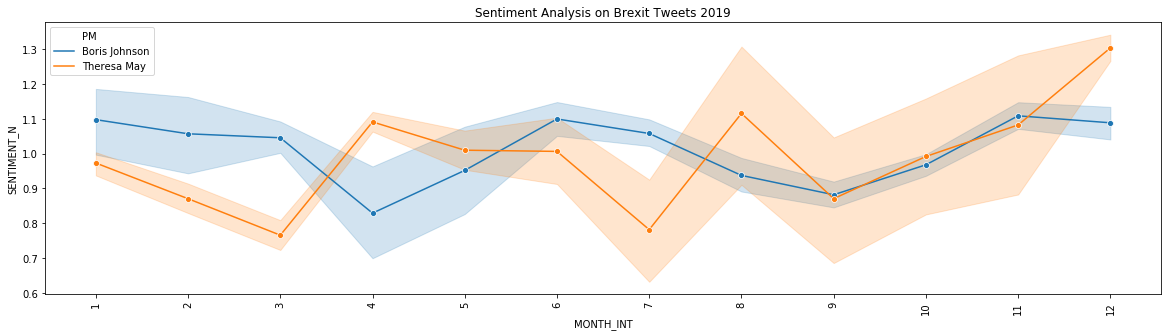

In [63]:
import matplotlib.dates as mdates
plt.figure(figsize=(20,5))
sns.lineplot(x='MONTH_INT', y='SENTIMENT_N', data=cdf, hue='PM', marker='o')
plt.title('Sentiment Analysis on Brexit Tweets 2019')
plt.xticks(cdf.MONTH_INT.sort_values().unique(), rotation=90) 
plt.show()

### WordClouds

In [67]:
#vectorizing with TfidfVectorizer for wordclous
tweets = [tweet for tweet in cdf['TWEET_CLEANED']]
tfidf_vec = TfidfVectorizer(use_idf=True, ngram_range=(1,3))  
tfidf_m = tfidf_vec.fit_transform(tweets)  
feature_names = tfidf_vec.get_feature_names()  

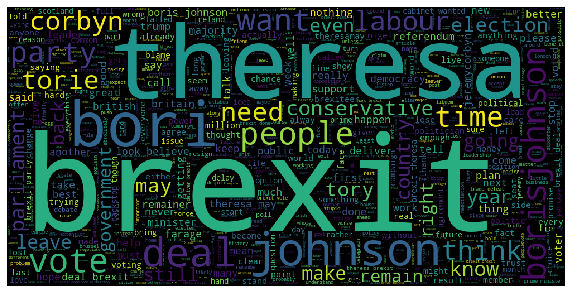

In [68]:
wc = WordCloud(height=500, width=1000, max_words=1000).generate(" ".join(feature_names))
plt.figure(figsize=(10, 10))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [69]:
df_march = cdf[(cdf.MONTH_STR == 'Mar')]
df_april = cdf[(cdf.MONTH_STR == 'Apr')]
df_june = cdf[(cdf.MONTH_STR == 'Jun')] 
df_july = cdf[(cdf.MONTH_STR == 'Jul')] 
df_nov = cdf[(cdf.MONTH_STR == 'Nov')] 
df_dec = cdf[(cdf.MONTH_STR == 'Dec')]

In [79]:
#vectorizing with TfidfVectorizer for wordclous
tweets = [tweet for tweet in df_july['TWEET_CLEANED'] if tweet not in ['brexit','theresa', 'may', 'johnson']]
tfidf_vec = TfidfVectorizer(use_idf=True, ngram_range=(1,3))  
tfidf_m = tfidf_vec.fit_transform(tweets)  
feature_names = tfidf_vec.get_feature_names()  

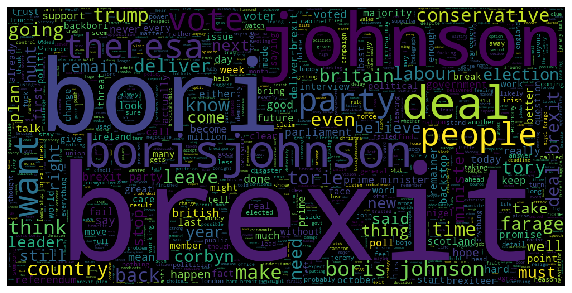

In [80]:
wc = WordCloud(height=500, width=1000, max_words=1000).generate(" ".join(feature_names))
plt.figure(figsize=(10, 10))
plt.imshow(wc)
plt.axis("off")
plt.show()